In [ ]:
import cv2
import numpy as np
import os

#load anh
path1 = '/content/drive/MyDrive/15p_gg/dataSet1/dataSet/DUY'
path2 = '/content/drive/MyDrive/15p_gg/dataSet1/dataSet/LUAN'
path3 = '/content/drive/MyDrive/15p_gg/dataSet1/dataSet/TAN'

images = []
a1 = np.full((1,60), 0)
a2 = np.full((1,60), 1)
a3 = np.full((1,60), 2)
c = np.concatenate((a1,a2), axis=1)
class_name = np.concatenate((c,a3), axis=1)
list1 = os.listdir(path1)
list2 = os.listdir(path2)
list3 = os.listdir(path3)
for c1 in list1:
    img1 = cv2.imread(f'{path1}/{c1}')
    images.append(img1)
for c2 in list2:
    img2 = cv2.imread(f'{path2}/{c2}')
    images.append(img2)
for c3 in list3:
    img3 = cv2.imread(f'{path3}/{c3}')
    images.append(img3)

In [ ]:
X = np.array(images)
y = class_name.T
print(X.shape)
print(y.shape)

(180, 150, 150, 3)
(180, 1)


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Dense,Activation,BatchNormalization, Dropout, LSTM, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.models import Sequential
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from tensorflow.keras.optimizers import RMSprop, SGD
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from sklearn.preprocessing import scale

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(x_test.shape)
print(y_test.shape)

(45, 150, 150, 3)
(45, 1)


In [ ]:
x_train = x_train.reshape(135, 67500)
x_test = x_test.reshape(45, 67500)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/=255
x_test/=255
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

In [ ]:

#ANN 
model = Sequential()
# SO LOP AO
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Desen("so data")
model.add(Dense(1024, kernel_initializer='normal',activation='relu', input_shape = (67500, )))
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
history = model.fit(x_train,y_train, batch_size=64,epochs=10,verbose=1,validation_data = (x_test, y_test))
model.save('/content/drive/MyDrive/15p_gg/model_face_ANN.h5')


Epoch 1/10
3/3 [==============================] - 4s 972ms/step - loss: 266.5698 - accuracy: 0.4000 - val_loss: 153.4488 - val_accuracy: 0.2889
Epoch 2/10
3/3 [==============================] - 3s 895ms/step - loss: 85.0452 - accuracy: 0.5481 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
3/3 [==============================] - 3s 818ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
3/3 [==============================] - 3s 939ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
3/3 [==============================] - 3s 952ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
3/3 [==============================] - 3s 810ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
3/3 [==============================] - 2s 753ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.000

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: ',score[0])
print('test accuracy: ', score[1])

y_pred = model.predict(x_test)
print(y_pred.flatten())
print(y_test)

Test loss:  0.0
test accuracy:  1.0


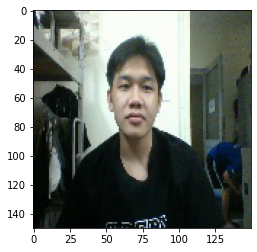

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from google.colab.patches import cv2_imshow

img = load_img('/content/drive/MyDrive/15p_gg/dataSet1/dataSet/DUY/DUY_10.jpg', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,67500)
img = img.astype('float32')
img/=255.0

In [ ]:
a = np.argmax(model.predict(img), axis=-1)
print(model.predict(img))
if a==0:
  print("DUY")
elif a==1:
  print("N.LUAN")
else:
  print("TAN")

[[1. 0. 0.]]
DUY
